In [1]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
from utils import label_map_util

from utils import visualization_utils as vis_util

utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 107

In [3]:
# This is needed to display the images.
%matplotlib inline

In [4]:
od_inference_dirs = ['od_1252812627_1fps', 'od_1252812923_1fps', 'od_169182094_1fps', 'od_169182098_1fps', 'od_279703428_1fps', 'od_279703885_1fps', 'od_942334491_1fps', 'od_942334494_1fps', 'od_3438636448_1fps', 'od_3477876483_1fps', 'od_3423612893_1fps', 'od_3497684122_1fps', 'od_3498539801_1fps', 'od_3498532459_1fps', 'od_3491078546_1fps', 'od_3582306776_1fps', 'od_3468314939_1fps']

labels = [0, 0, 1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11]

label2name = {0:'Game of Throne', 1: 'Friends', 2: 'Sopranos', 3: 'Breaking Bad', 4: 'Africa\'s Hunters', 5: 'Africa\'s Wild', 6: 'Big Bang Theory', 7: '16 and Pregnant', 8: 'Teen Mom', 9: '4th & Forever', 10: '24/7 College', 11: 'Camelot'}

In [5]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/root/models/research/object_detection/data', 'oid_bbox_trainable_label_map_add2.pbtxt')
NUM_CLASSES = 547

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [6]:
with open('/root/openimage/f_score_v5.pickle', 'rb') as handle:
    maxF_dict = pickle.load(handle)

In [7]:
def read_frames_todict(input_dir):
# input_dir = '/root/video_inference/od_infrence_1252812627'
    od_dict = {}
    for folder in sorted(os.listdir(input_dir)):
        input_file = os.path.join(input_dir, folder)
        with open(input_file, 'rb') as handle:
            output_dict = pickle.load(handle)
        od_dict[folder] = output_dict
    return od_dict

def calculate_words(od_dict, NUM_CLASSES, maxF_dict):
    class_counts = { idx+1:0 for idx in range(NUM_CLASSES)}
    for key, frame in od_dict.items():
        for c, prob in zip(frame['detection_classes'], frame['detection_scores']):
            if prob > maxF_dict[c]['Threshold']:
                class_counts[c] += 1
    return class_counts

def plot_class(od_dir, results, NUM_CLASSES, topN=5, out_path=''):
    results[od_dir]['Words']
    total_cnt = 0
#     for cnt in results[od_dir]['Words'].values():
#         total_cnt += cnt
    total_cnt = sum(results[od_dir]['Words'].values())
    xx = [x+1 for x in range(NUM_CLASSES)]
    yy = [results[od_dir]['Words'][x+1]*100.0/total_cnt   for x in range(NUM_CLASSES)  ]
    plt.xlim(0, 547);
    # plt.ylim(0, 1.0);
    plt.plot(xx, yy, 'ob');
    print_topN(od_dir, results, topN)
    if out_path:
        plt.savefig(out_path, transparent=False, dpi = 300)
        
def print_topN(od_dir, results, topN=5):
    wordsFreqDict=results[od_dir]['Words']
    # Create a list of tuples sorted by index 1 i.e. value field     
    listofTuples = sorted(wordsFreqDict.items() ,  key=lambda x: x[1], reverse=True)
    # Iterate over the sorted sequence
    total_cnt = sum(results[od_dir]['Words'].values())
#     print('ID', 'frequency', 'Name' )
    print("{0},{1},{2}".format('ID', 'frequency (%)', 'Name' ))
    for elem in listofTuples[0:topN] :
#         print(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'] )
        print("{0},{1:0.2f},{2}".format(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name']))




In [8]:
results = {}

ID,frequency (%),Name
47,20.42,Arm
37,15.27,Hair
32,10.21,Human body
2,8.96,Clothing
39,8.68,Head
45,5.52,Mammal
7,4.86,Woman
1,3.87,Person
12,3.03,Girl
3,2.82,Man
4,2.61,Face
23,1.76,Table
29,1.29,Dress
18,0.98,Furniture
103,0.95,Couch
55,0.93,Nose
6,0.62,Plant
62,0.53,Eye
64,0.46,Mouth
9,0.45,Building


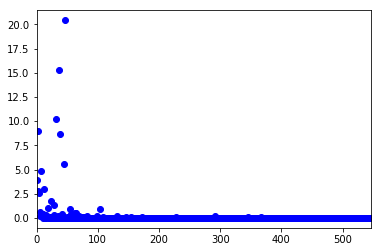

In [9]:
od_dir = 'od_169182098_1fps' #f2
results[od_dir] = {}
results[od_dir]['Raw'] = read_frames_todict('/root/ampvideo_inference/'+od_dir)
results[od_dir]['Words'] = calculate_words(results[od_dir]['Raw'], NUM_CLASSES, maxF_dict)
plot_class(od_dir, results, NUM_CLASSES,20)

## process all

In [10]:
inference_dir = '/root/ampvideo_inference/'
for od_dir in od_inference_dirs:

    results[od_dir] = {}
    results[od_dir]['Raw'] = read_frames_todict(inference_dir+od_dir)
    results[od_dir]['Words'] = calculate_words(results[od_dir]['Raw'], NUM_CLASSES, maxF_dict)
#     plot_class(od_dir, results, NUM_CLASSES,20)

## select some TV shows
friends, game of T, 'Africa's Hunters

In [11]:
od_inference_dirs_select = []
labels_select = []
for idx, label in enumerate(labels): 
    if label in [0,1,4]:
        labels_select.append(label)
        od_inference_dirs_select.append(od_inference_dirs[idx])

# Prepare for model

In [106]:
corpus = []
for idx, od_dir in enumerate(od_inference_dirs_select): 
    corpus.append(results[od_inference_dirs_select[idx]]['Words'].items())


In [107]:
corpus[0]

[(1, 3800),
 (2, 3592),
 (3, 1313),
 (4, 2521),
 (5, 1563),
 (6, 480),
 (7, 2583),
 (8, 878),
 (9, 149),
 (10, 12),
 (11, 29),
 (12, 894),
 (13, 378),
 (14, 0),
 (15, 23),
 (16, 34),
 (17, 3),
 (18, 38),
 (19, 77),
 (20, 16),
 (21, 5),
 (22, 131),
 (23, 15),
 (24, 7),
 (25, 2),
 (26, 8),
 (27, 7),
 (28, 250),
 (29, 362),
 (30, 31),
 (31, 2),
 (32, 7635),
 (33, 0),
 (34, 5),
 (35, 10),
 (36, 0),
 (37, 16111),
 (38, 6),
 (39, 13156),
 (40, 0),
 (41, 1),
 (42, 2),
 (43, 0),
 (44, 0),
 (45, 11931),
 (46, 1),
 (47, 7601),
 (48, 0),
 (49, 246),
 (50, 1),
 (51, 2),
 (52, 18),
 (53, 2),
 (54, 0),
 (55, 5393),
 (56, 0),
 (57, 10),
 (58, 3),
 (59, 0),
 (60, 0),
 (61, 6),
 (62, 3607),
 (63, 2),
 (64, 4005),
 (65, 1),
 (66, 1),
 (67, 0),
 (68, 30),
 (69, 3),
 (70, 116),
 (71, 2),
 (72, 2),
 (73, 15),
 (74, 0),
 (75, 44),
 (76, 115),
 (77, 0),
 (78, 0),
 (79, 1),
 (80, 0),
 (81, 78),
 (82, 1),
 (83, 1),
 (84, 0),
 (85, 1),
 (86, 1),
 (87, 0),
 (88, 0),
 (89, 0),
 (90, 0),
 (91, 30),
 (92, 0),
 (93,

In [108]:
corpus[4]

[(1, 12),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 423),
 (6, 3959),
 (7, 0),
 (8, 1604),
 (9, 0),
 (10, 1),
 (11, 0),
 (12, 0),
 (13, 2198),
 (14, 0),
 (15, 0),
 (16, 1),
 (17, 6),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 0),
 (26, 0),
 (27, 234),
 (28, 168),
 (29, 0),
 (30, 81),
 (31, 48),
 (32, 64),
 (33, 0),
 (34, 0),
 (35, 2),
 (36, 8),
 (37, 77),
 (38, 0),
 (39, 411),
 (40, 0),
 (41, 6),
 (42, 0),
 (43, 0),
 (44, 0),
 (45, 5536),
 (46, 0),
 (47, 143),
 (48, 0),
 (49, 0),
 (50, 24),
 (51, 0),
 (52, 3),
 (53, 12),
 (54, 0),
 (55, 176),
 (56, 0),
 (57, 0),
 (58, 0),
 (59, 0),
 (60, 0),
 (61, 0),
 (62, 74),
 (63, 0),
 (64, 118),
 (65, 1),
 (66, 1),
 (67, 0),
 (68, 0),
 (69, 0),
 (70, 0),
 (71, 0),
 (72, 0),
 (73, 0),
 (74, 0),
 (75, 0),
 (76, 148),
 (77, 0),
 (78, 0),
 (79, 0),
 (80, 0),
 (81, 0),
 (82, 0),
 (83, 0),
 (84, 0),
 (85, 0),
 (86, 0),
 (87, 0),
 (88, 0),
 (89, 0),
 (90, 0),
 (91, 0),
 (92, 0),
 (93, 0),
 (94, 0),
 (95, 0),
 (96, 0),
 (97, 0),
 (9

In [15]:
category_index

{1: {'id': 1, 'name': u'Person'},
 2: {'id': 2, 'name': u'Clothing'},
 3: {'id': 3, 'name': u'Man'},
 4: {'id': 4, 'name': u'Face'},
 5: {'id': 5, 'name': u'Tree'},
 6: {'id': 6, 'name': u'Plant'},
 7: {'id': 7, 'name': u'Woman'},
 8: {'id': 8, 'name': u'Vehicle'},
 9: {'id': 9, 'name': u'Building'},
 10: {'id': 10, 'name': u'Land vehicle'},
 11: {'id': 11, 'name': u'Footwear'},
 12: {'id': 12, 'name': u'Girl'},
 13: {'id': 13, 'name': u'Animal'},
 14: {'id': 14, 'name': u'Car'},
 15: {'id': 15, 'name': u'Food'},
 16: {'id': 16, 'name': u'Wheel'},
 17: {'id': 17, 'name': u'Flower'},
 18: {'id': 18, 'name': u'Furniture'},
 19: {'id': 19, 'name': u'Window'},
 20: {'id': 20, 'name': u'House'},
 21: {'id': 21, 'name': u'Boy'},
 22: {'id': 22, 'name': u'Fashion accessory'},
 23: {'id': 23, 'name': u'Table'},
 24: {'id': 24, 'name': u'Glasses'},
 25: {'id': 25, 'name': u'Suit'},
 26: {'id': 26, 'name': u'Auto part'},
 27: {'id': 27, 'name': u'Bird'},
 28: {'id': 28, 'name': u'Sports equipmen

In [109]:
# # List of the strings that is used to add correct label for each box.
# PATH_TO_LABELS = os.path.join('/root/models/research/object_detection/data', 'oid_bbox_trainable_label_map_add2.pbtxt')
# NUM_CLASSES = 547

# label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
# categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
# category_index = label_map_util.create_category_index(categories)
id2word = {}
for key, value in category_index.items():
    id2word[key] = category_index[key]['name']

In [110]:
id2word

{1: u'Person',
 2: u'Clothing',
 3: u'Man',
 4: u'Face',
 5: u'Tree',
 6: u'Plant',
 7: u'Woman',
 8: u'Vehicle',
 9: u'Building',
 10: u'Land vehicle',
 11: u'Footwear',
 12: u'Girl',
 13: u'Animal',
 14: u'Car',
 15: u'Food',
 16: u'Wheel',
 17: u'Flower',
 18: u'Furniture',
 19: u'Window',
 20: u'House',
 21: u'Boy',
 22: u'Fashion accessory',
 23: u'Table',
 24: u'Glasses',
 25: u'Suit',
 26: u'Auto part',
 27: u'Bird',
 28: u'Sports equipment',
 29: u'Dress',
 30: u'Dog',
 31: u'Carnivore',
 32: u'Human body',
 33: u'Jeans',
 34: u'Musical instrument',
 35: u'Drink',
 36: u'Boat',
 37: u'Hair',
 38: u'Tire',
 39: u'Head',
 40: u'Cat',
 41: u'Watercraft',
 42: u'Chair',
 43: u'Bike',
 44: u'Tower',
 45: u'Mammal',
 46: u'Skyscraper',
 47: u'Arm',
 48: u'Toy',
 49: u'Sculpture',
 50: u'Invertebrate',
 51: u'Microphone',
 52: u'Poster',
 53: u'Insect',
 54: u'Guitar',
 55: u'Nose',
 56: u'Hat',
 57: u'Tableware',
 58: u'Door',
 59: u'Bicycle wheel',
 60: u'Sunglasses',
 61: u'Baked g

In [111]:
# corpus [[(0, 4),(id, counts),  ]...]
# id2word {id:'name', 0: u'name 1',}
# labels [0,1,2,2...] int
# label2name {0: showname} string
# od_inference_dirs ['od_3438636448_1fps'...] string
# model = LdaModel(
#     corpus=corpus,
#     id2word=id2word,
#     chunksize=chunksize,
#     alpha='auto',
#     eta='auto',
#     iterations=iterations,
#     num_topics=num_topics,
#     passes=passes,
#     eval_every=eval_every
# )

## run LDA

In [112]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 3
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
# temp = dictionary[0]  # This is only to "load" the dictionary.
# id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [113]:
top_topics = model.top_topics(corpus) #, num_words=20)
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)


Average topic coherence: 0.0000.
[([(0.33373988, u'Mammal'),
   (0.23748435, u'Plant'),
   (0.13227166, u'Animal'),
   (0.09673788, u'Vehicle'),
   (0.025709251, u'Tree'),
   (0.02474661, u'Head'),
   (0.014000835, u'Deer'),
   (0.01395147, u'Bird'),
   (0.012127544, u'Cattle'),
   (0.0105649335, u'Nose'),
   (0.010209986, u'Sports equipment'),
   (0.008943027, u'Horse'),
   (0.00861387, u'Arm'),
   (0.0070973705, u'Mouth'),
   (0.0048165657, u'Dog'),
   (0.0046501267, u'Hair'),
   (0.0044634556, u'Eye'),
   (0.0043641008, u'Cheetah'),
   (0.0038727021, u'Human body'),
   (0.0036595617, u'Zebra')],
  1.0000889005818406e-12),
 ([(0.18171744, u'Hair'),
   (0.14609797, u'Head'),
   (0.12141727, u'Mammal'),
   (0.087405816, u'Arm'),
   (0.08183178, u'Human body'),
   (0.07310109, u'Nose'),
   (0.051484417, u'Mouth'),
   (0.0437467, u'Eye'),
   (0.039793767, u'Person'),
   (0.036501978, u'Clothing'),
   (0.02796166, u'Face'),
   (0.026263352, u'Woman'),
   (0.01405677, u'Man'),
   (0.012461

In [114]:
print(len(corpus))

5


## visualization

## force to use dictionary

In [115]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [116]:
corpus_strings = []
for corpus_1 in corpus:
    corpus_string = []
    for item in corpus_1:
        name = id2word[item[0]]
        counts = item[1]
        for _ in range(counts):
            corpus_string.append(name)
    corpus_strings.append(corpus_string)

In [281]:
train_texts = corpus_strings
dictionary = Dictionary(train_texts)
corpus2 = [dictionary.doc2bow(text) for text in train_texts]

In [168]:

ldamodel = LdaModel(corpus=corpus2, num_topics=3, id2word=dictionary)


In [271]:
# Set training parameters.
num_topics = 3
chunksize = 2000
passes = 120
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
# temp = dictionary[0]  # This is only to "load" the dictionary.
# id2word = dictionary.id2token

ldamodel = LdaModel(
    corpus=corpus2,
    id2word=dictionary,
    chunksize=chunksize,
    alpha=[1,1,1],
    eta=[1,1,1],
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [272]:
# for text in corpus_strings:
# #     text = corpus_strings[0]
#     bow = dictionary.doc2bow(text)
#     _ = ldamodel.get_document_topics(bow)
#     print(_)

[(0, 0.890235), (2, 0.10837577)]
[(0, 0.9064049), (2, 0.09217347)]
[(0, 0.9989328)]
[(0, 0.997226)]
[(1, 0.9710472), (2, 0.024900706)]


In [270]:
## mulit core
# ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, num_topics=20, passes = 100)


In [262]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()


In [288]:
# Set training parameters.
num_topics = 3
chunksize = 2000
passes = 120
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
# temp = dictionary[0]  # This is only to "load" the dictionary.
# id2word = dictionary.id2token

ldamodel = LdaModel(
    corpus=corpus2,
    id2word=dictionary,
    chunksize=chunksize,
    alpha=[1,1,1],
    eta=1,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)
ldamodel.print_topics()

[(0,
  u'0.204*"Arm" + 0.143*"Hair" + 0.109*"Human body" + 0.102*"Clothing" + 0.080*"Head" + 0.053*"Mammal" + 0.051*"Woman" + 0.040*"Person" + 0.030*"Man" + 0.028*"Face"'),
 (1,
  u'0.332*"Mammal" + 0.237*"Plant" + 0.132*"Animal" + 0.096*"Vehicle" + 0.026*"Tree" + 0.025*"Head" + 0.014*"Bird" + 0.014*"Deer" + 0.012*"Cattle" + 0.011*"Nose"'),
 (2,
  u'0.181*"Hair" + 0.146*"Head" + 0.122*"Mammal" + 0.087*"Arm" + 0.082*"Human body" + 0.073*"Nose" + 0.052*"Mouth" + 0.044*"Eye" + 0.040*"Person" + 0.036*"Clothing"')]

In [289]:



for bow in corpus2:
#     text = corpus_strings[0]
#     bow = dictionary.doc2bow(text)
    _ = ldamodel.get_document_topics(bow)
    print(_)

# import gensim
# from gensim import corpora, models
pyLDAvis.gensim.prepare(ldamodel, corpus2, dictionary)



[(2, 0.99529576)]
[(2, 0.999763)]
[(0, 0.99872774)]
[(0, 0.950049), (2, 0.049309213)]
[(1, 0.99960655)]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      68.853867        1       1 -0.094369 -0.020905
0      24.856075        1       2 -0.202724  0.016373
1       6.290053        1       3  0.297092  0.004532, topic_info=    Category          Freq              Term         Total  loglift  logprob
228  Default  31243.000000            Mammal  31243.000000  30.0000  30.0000
197  Default   5233.000000             Plant   5233.000000  29.0000  29.0000
53   Default  29472.000000               Arm  29472.000000  28.0000  28.0000
129  Default   2919.000000            Animal   2919.000000  27.0000  27.0000
244  Default  13363.000000          Clothing  13363.000000  26.0000  26.0000
61   Default   3478.000000           Vehicle   3478.000000  25.0000  25.0000
68   Default  22173.000000        Human body  22173.000000  24.0000  24.0000
102  Default  42642.000000              Hair  42642.000000  23.0000  23.0000
92   Default   2761.000000              Tree   2761.000000  22.0000  22.0000
14   Default   8154.000000             Woman   8154.000000  21.0000  21.0000
212  Default   4539.000000               Man   4539.000000  20.0000  20.0000
242  Default   3523.000000              Girl   3523.000000  19.0000  19.0000
207  Default   9737.000000             Mouth   9737.000000  18.0000  18.0000
225  Default  13894.000000              Nose  13894.000000  17.0000  17.0000
158  Default   9879.000000            Person   9879.000000  16.0000  16.0000
241  Default   1241.000000             Table   1241.000000  15.0000  15.0000
156  Default   6923.000000              Face   6923.000000  14.0000  14.0000
4    Default   8254.000000               Eye   8254.000000  13.0000  13.0000
52   Default   1349.000000             Dress   1349.000000  12.0000  12.0000
161  Default    654.000000  Sports equipment    654.000000  11.0000  11.0000
25   Default    806.000000         Furniture    806.000000  10.0000  10.0000
71   Default  32336.000000              Head  32336.000000   9.0000   9.0000
2    Default    367.000000             Horse    367.000000   8.0000   8.0000
185  Default    583.000000             Couch    583.000000   7.0000   7.0000
12   Default    254.000000              Bird    254.000000   6.0000   6.0000
235  Default    245.000000              Deer    245.000000   5.0000   5.0000
239  Default    240.000000            Cattle    240.000000   4.0000   4.0000
221  Default    280.000000               Dog    280.000000   3.0000   3.0000
103  Default    346.000000         Tableware    346.000000   2.0000   2.0000
26   Default    578.000000          Building    578.000000   1.0000   1.0000
..       ...           ...               ...           ...      ...      ...
93    Topic3      7.882862           Ostrich      9.877829   2.5406  -7.6571
142   Topic3     13.056450            Insect     16.783016   2.5151  -7.1526
88    Topic3      6.897292         Jellyfish      8.892258   2.5121  -7.7907
180   Topic3      6.897292            Alpaca      8.892258   2.5121  -7.7907
197   Topic3   3956.174072             Plant   5233.732910   2.4864  -1.4388
129   Topic3   2199.171631            Animal   2919.825928   2.4828  -2.0260
49    Topic3      5.911726             Goose      7.906692   2.4754  -7.9449
216   Topic3      4.926176          Sea lion      6.921141   2.4262  -8.1273
165   Topic3     48.440590         Carnivore     71.235802   2.3805  -5.8415
83    Topic3      5.999826            Rabbit      8.890466   2.3730  -7.9301
85    Topic3      3.940650          Doughnut      5.935614   2.3566  -8.3505
215   Topic3      3.940650            Jaguar      5.935614   2.3566  -8.3505
211   Topic3      7.027104             Whale     10.870816   2.3299  -7.7721
48    Topic3      2.955177               Pig      4.950140   2.2503  -8.6383
56    Topic3      6.964038        Watercraft     11.862700   2.2336  -7.7811
61    Topic3   1606.193237           Vehicle   3478.301514   1.9935 

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
2      48.017281        1       1 -0.150406  0.0
0      44.589146        1       2 -0.223930  0.0
1       7.393566        1       3  0.374335  0.0, topic_info=  Category          Freq    Term         Total  loglift  logprob
2  Default   2954.000000  Animal   2954.000000   3.0000   3.0000
0  Default   1245.000000   Table   1245.000000   2.0000   2.0000
1  Default  29535.000000     Arm  29535.000000   1.0000   1.0000
1   Topic1  15609.599609     Arm  29535.521484   0.0959  -0.0371
2   Topic1    569.884216  Animal   2954.931641  -0.9122  -3.3473
0   Topic1     19.626894   Table   1245.546265  -3.4168  -6.7158
0   Topic2   1224.874878   Table   1245.546265   0.7909  -2.5080
1   Topic2  13811.411133     Arm  29535.521484   0.0476  -0.0854
2   Topic2      6.308202  Animal   2954.931641  -5.3417  -7.7768
2   Topic3   2378.739258  Animal   2954.931641   2.3877  -0.0474
1   Topic3    114.509865     Arm  29535.521484  -2.9481  -3.0811
0   Topic3      1.044490   Table   1245.546265  -4.4792  -7.7782, token_table=      Topic      Freq    Term
term                         
2         1  0.192898  Animal
2         2  0.002031  Animal
2         3  0.805095  Animal
1         1  0.528516     Arm
1         2  0.467606     Arm
1         3  0.003894     Arm
0         1  0.016057   Table
0         2  0.983504   Table
0         3  0.000803   Table, R=3, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [201]:
# import gensim
# from gensim import corpora, models
pyLDAvis.gensim.prepare(ldamodel, corpus2, dictionary)


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      81.473396        1       1 -0.185522 -0.054424
2       9.450382        1       2 -0.198930  0.053173
0       9.076221        1       3  0.384452  0.001251, topic_info=  Category          Freq    Term         Total  loglift  logprob
1  Default  29407.000000     Arm  29407.000000   3.0000   3.0000
2  Default   2962.000000  Animal   2962.000000   2.0000   2.0000
0  Default   1366.000000   Table   1366.000000   1.0000   1.0000
1   Topic1  27099.935547     Arm  29407.417969   0.1232  -0.0141
0   Topic1    314.816528   Table   1366.274902  -1.2630  -4.4694
2   Topic1     71.113060  Animal   2962.307861  -3.5246  -5.9572
0   Topic2   1050.422241   Table   1366.274902   2.0962  -1.1103
1   Topic2   2132.490479     Arm  29407.417969  -0.2648  -0.4022
2   Topic2      5.268197  Animal   2962.307861  -3.9729  -6.4055
2   Topic3   2885.926514  Animal   2962.307861   2.3734  -0.0592
1   Topic3    174.991470     Arm  29407.417969  -2.7248  -2.8621
0   Topic3      1.036108   Table   1366.274902  -4.7849  -7.9913, token_table=      Topic      Freq    Term
term                         
2         1  0.023968  Animal
2         2  0.001688  Animal
2         3  0.974240  Animal
1         1  0.921536     Arm
1         2  0.072499     Arm
1         3  0.005951     Arm
0         1  0.230554   Table
0         2  0.768513   Table
0         3  0.000732   Table, R=3, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [155]:
new_corpus = []
for doc in corpus_strings:
    newdoc = []
    for word in doc:
        if word not in ['Animal', 'Arm', 'Table']:
            continue
        newdoc.append(word)
    new_corpus.append(newdoc)

In [74]:
new_corpus = []
for doc in corpus_strings:
    newdoc = []
    for word in doc:
        if word in ['Hair', 'Head', 'Human body', 'Mammal', 'Arm', 'Nose', 'Mouth', 'Person', 'Clothing', 'Eye', 'Woman', 'Face', 'Man', 'Girl']:
            continue
        newdoc.append(word)
    new_corpus.append(newdoc)

In [152]:
train_texts = new_corpus
dictionary = Dictionary(train_texts)
corpus2 = [dictionary.doc2bow(text) for text in train_texts]

In [156]:
ldamodel = LdaModel(corpus=corpus2, num_topics=3, id2word=dictionary)



In [157]:
for bow in corpus2:
#     text = corpus_strings[0]
#     bow = dictionary.doc2bow(text)
    _ = ldamodel.get_document_topics(bow)
    print(_)

[(0, 0.23044403), (1, 0.59131896), (2, 0.17823707)]
[(0, 0.2042971), (1, 0.57461655), (2, 0.22108632)]
[(0, 0.017316254), (1, 0.07502682), (2, 0.9076569)]
[(0, 0.023646072), (1, 0.08647765), (2, 0.8898763)]
[(0, 0.99969)]


In [138]:
labels_select
label_name_select = [ label2name[item] for item in labels_select]
print(label_name_select)

['Game of Throne', 'Game of Throne', 'Friends', 'Friends', "Africa's Hunters"]


In [137]:
pyLDAvis.gensim.prepare(ldamodel, corpus2, dictionary)



PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
0      91.264900        1       1 -0.276798  0.0
1       7.125493        1       2  0.243202  0.0
2       1.609599        1       3  0.033595  0.0, topic_info=  Category          Freq    Term         Total  loglift  logprob
0  Default  29239.000000     Arm  29239.000000   2.0000   2.0000
1  Default   3253.000000  Animal   3253.000000   1.0000   1.0000
0   Topic1  28915.515625     Arm  29239.673828   0.0803  -0.0252
1   Topic1    739.192139  Animal   3253.327148  -1.3905  -3.6918
1   Topic2   2174.257812  Animal   3253.327148   2.2385  -0.0628
0   Topic2    141.029205     Arm  29239.673828  -2.6928  -2.7983
1   Topic3    339.877319  Animal   3253.327148   1.8703  -0.4310
0   Topic3    183.129745     Arm  29239.673828  -0.9439  -1.0494, token_table=      Topic      Freq    Term
term                         
1         1  0.227152  Animal
1         2  0.668239  Animal
1         3  0.104508  Animal
0         1  0.988930     Arm
0         2  0.004822     Arm
0         3  0.006259     Arm, R=2, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [131]:
corpus2[4]

[(0, 2198), (1, 143)]

In [132]:
corpus2[0]

[(0, 378), (1, 7601)]

In [133]:
corpus2

[[(0, 378), (1, 7601)],
 [(0, 351), (1, 8220)],
 [(0, 7), (1, 6934)],
 [(0, 16), (1, 6645)],
 [(0, 2198), (1, 143)]]

# add 2 africa movie


In [290]:
od_inference_dirs_select = []
labels_select = []
for idx, label in enumerate(labels): 
    if label in [0,1,4, 5]:
        labels_select.append(label)
        od_inference_dirs_select.append(od_inference_dirs[idx])

In [305]:
corpus = []
for idx, od_dir in enumerate(od_inference_dirs_select): 
    corpus.append(results[od_inference_dirs_select[idx]]['Words'].items())


corpus_strings = []
for corpus_1 in corpus:
    corpus_string = []
    for item in corpus_1:
        name = id2word[item[0]]
        counts = item[1]
        for _ in range(counts):
            corpus_string.append(name)
    corpus_strings.append(corpus_string)

train_texts = corpus_strings
dictionary = Dictionary(train_texts)
corpus2 = [dictionary.doc2bow(text) for text in train_texts]


# Set training parameters.
num_topics = 3
chunksize = 2000
passes = 120
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
# temp = dictionary[0]  # This is only to "load" the dictionary.
# id2word = dictionary.id2token

ldamodel = LdaModel(
    corpus=corpus2,
    id2word=dictionary,
    chunksize=chunksize,
    alpha=[1,1,1],
    eta=2,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)
ldamodel.print_topics()






[(0,
  u'0.181*"Hair" + 0.146*"Head" + 0.122*"Mammal" + 0.087*"Arm" + 0.082*"Human body" + 0.073*"Nose" + 0.052*"Mouth" + 0.044*"Eye" + 0.040*"Person" + 0.036*"Clothing"'),
 (1,
  u'0.302*"Mammal" + 0.232*"Plant" + 0.099*"Animal" + 0.091*"Tree" + 0.065*"Vehicle" + 0.030*"Head" + 0.013*"Cattle" + 0.012*"Deer" + 0.010*"Arm" + 0.009*"Sports equipment"'),
 (2,
  u'0.203*"Arm" + 0.143*"Hair" + 0.109*"Human body" + 0.102*"Clothing" + 0.080*"Head" + 0.053*"Mammal" + 0.051*"Woman" + 0.039*"Person" + 0.030*"Man" + 0.028*"Face"')]

In [306]:

for bow in corpus2:
#     text = corpus_strings[0]
#     bow = dictionary.doc2bow(text)
    _ = ldamodel.get_document_topics(bow)
    print(_)

# import gensim
# from gensim import corpora, models
pyLDAvis.gensim.prepare(ldamodel, corpus2, dictionary)




[(0, 0.9971479)]
[(0, 0.99982285)]
[(2, 0.99857986)]
[(0, 0.050201736), (2, 0.9490711)]
[(1, 0.99971396)]
[(0, 0.014569174), (1, 0.9851463)]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      65.015999        1       1 -0.091416 -0.023105
2      23.361979        1       2 -0.197607  0.018063
1      11.622020        1       3  0.289023  0.005042, topic_info=    Category          Freq                   Term         Total  loglift  \
243  Default  35575.000000                 Mammal  35575.000000  30.0000   
209  Default   8865.000000                  Plant   8865.000000  29.0000   
56   Default  29586.000000                    Arm  29586.000000  28.0000   
96   Default   5309.000000                   Tree   5309.000000  27.0000   
263  Default  13331.000000               Clothing  13331.000000  26.0000   
136  Default   3969.000000                 Animal   3969.000000  25.0000   
108  Default  42726.000000                   Hair  42726.000000  24.0000   
71   Default  22313.000000             Human body  22313.000000  23.0000   
64   Default   3995.000000                Vehicle   3995.000000  22.0000   
14   Default   8136.000000                  Woman   8136.000000  21.0000   
224  Default   4534.000000                    Man   4534.000000  20.0000   
261  Default   3516.000000                   Girl   3516.000000  19.0000   
167  Default   9888.000000                 Person   9888.000000  18.0000   
165  Default   6915.000000                   Face   6915.000000  17.0000   
260  Default   1239.000000                  Table   1239.000000  16.0000   
219  Default   9808.000000                  Mouth   9808.000000  15.0000   
240  Default  13956.000000                   Nose  13956.000000  14.0000   
55   Default   1347.000000                  Dress   1347.000000  13.0000   
4    Default   8320.000000                    Eye   8320.000000  12.0000   
258  Default    480.000000                 Cattle    480.000000  11.0000   
26   Default    805.000000              Furniture    805.000000  10.0000   
253  Default    400.000000                   Deer    400.000000   9.0000   
197  Default    584.000000                  Couch    584.000000   8.0000   
170  Default    788.000000       Sports equipment    788.000000   7.0000   
2    Default    442.000000                  Horse    442.000000   6.0000   
158  Default    302.000000                Cheetah    302.000000   5.0000   
12   Default    290.000000                   Bird    290.000000   4.0000   
75   Default  32884.000000                   Head  32884.000000   3.0000   
82   Default    264.000000                Leopard    264.000000   2.0000   
110  Default    348.000000              Tableware    348.000000   1.0000   
..       ...           ...                    ...           ...      ...   
246   Topic3     31.482368               Squirrel     35.464703   2.0332   
109   Topic3     28.530205              Crocodile     32.512520   2.0216   
153   Topic3     27.549198                Giraffe     31.528465   2.0174   
73    Topic3     25.578054              Butterfly     29.560341   2.0076   
209   Topic3   7574.334473                  Plant   8865.121094   1.9949   
256   Topic3     19.673800  Moths and butterflies     23.656010   1.9679   
222   Topic3     25.710798                 Falcon     31.540857   1.9479   
136   Topic3   3233.630127                 Animal   3969.415283   1.9473   
17    Topic3     16.725515               Kangaroo     20.703869   1.9389   
137   Topic3     14.757429                Sparrow     18.735781   1.9136   
65    Topic3     17.770170                    Fox     22.675940   1.9085   
92    Topic3     13.771535              Jellyfish     17.751740   1.8984   
208   Topic3     77.189400                  Eagle    103.639481   1.8576   
9     Topic3    115.798241                 Flower    158.780121   1.8366   
189   Topic3      9.837310                   Boat     13.815657   1.8126   
51    Topic3      9.834674                    Pig     13.815655   1.8124   
175   Topic3     52.201580             

In [ ]:
# add football and africa

In [307]:
od_inference_dirs_select = []
labels_select = []
for idx, label in enumerate(labels): 
    if label in [0,1,4, 5, 9, 10]:
        labels_select.append(label)
        od_inference_dirs_select.append(od_inference_dirs[idx])

In [320]:
corpus = []
for idx, od_dir in enumerate(od_inference_dirs_select): 
    corpus.append(results[od_inference_dirs_select[idx]]['Words'].items())


corpus_strings = []
for corpus_1 in corpus:
    corpus_string = []
    for item in corpus_1:
        name = id2word[item[0]]
        counts = item[1]
        for _ in range(counts):
            corpus_string.append(name)
    corpus_strings.append(corpus_string)

train_texts = corpus_strings
dictionary = Dictionary(train_texts)
corpus2 = [dictionary.doc2bow(text) for text in train_texts]


# Set training parameters.
num_topics = 4
chunksize = 2000
passes = 120
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
# temp = dictionary[0]  # This is only to "load" the dictionary.
# id2word = dictionary.id2token

ldamodel = LdaModel(
    corpus=corpus2,
    id2word=dictionary,
    chunksize=chunksize,
    alpha=[1,1,1,1],
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)
ldamodel.print_topics()


[(0,
  u'0.306*"Mammal" + 0.234*"Plant" + 0.100*"Animal" + 0.093*"Tree" + 0.065*"Vehicle" + 0.030*"Head" + 0.014*"Cattle" + 0.012*"Deer" + 0.010*"Arm" + 0.009*"Sports equipment"'),
 (1,
  u'0.203*"Arm" + 0.144*"Hair" + 0.110*"Human body" + 0.103*"Clothing" + 0.081*"Head" + 0.053*"Mammal" + 0.052*"Woman" + 0.039*"Person" + 0.030*"Man" + 0.028*"Face"'),
 (2,
  u'0.182*"Hair" + 0.146*"Head" + 0.121*"Mammal" + 0.088*"Arm" + 0.082*"Human body" + 0.073*"Nose" + 0.053*"Mouth" + 0.045*"Eye" + 0.040*"Person" + 0.036*"Clothing"'),
 (3,
  u'0.148*"Arm" + 0.110*"Mammal" + 0.106*"Head" + 0.097*"Person" + 0.087*"Clothing" + 0.080*"Human body" + 0.072*"Hair" + 0.048*"Sports equipment" + 0.047*"Man" + 0.026*"Nose"')]

In [324]:
for idx, bow in enumerate(corpus2):
#     text = corpus_strings[0]
#     bow = dictionary.doc2bow(text)
    _ = ldamodel.get_document_topics(bow)
    print(_, label2name[labels_select[idx]])

# import gensim
# from gensim import corpora, models
pyLDAvis.gensim.prepare(ldamodel, corpus2, dictionary)

([(2, 0.97944516), (3, 0.012145093)], 'Game of Throne')
([(2, 0.9996037)], 'Game of Throne')
([(1, 0.9982245)], 'Friends')
([(1, 0.94912267), (2, 0.045921117)], 'Friends')
([(0, 0.9995731)], "Africa's Hunters")
([(0, 0.98366255), (2, 0.014209093)], "Africa's Wild")
([(2, 0.30592322), (3, 0.6935237)], '4th & Forever')
([(1, 0.1289379), (3, 0.86884993)], '24/7 College')


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      49.404896        1       1  0.064971  0.046927
3      22.652750        1       2  0.080372 -0.048932
1      19.437698        1       3  0.177057  0.003063
0       8.504649        1       4 -0.322400 -0.001059, topic_info=    Category          Freq              Term         Total  loglift  logprob
298  Default  46926.000000            Mammal  46926.000000  30.0000  30.0000
258  Default   9369.000000             Plant   9369.000000  29.0000  29.0000
76   Default  45426.000000               Arm  45426.000000  28.0000  28.0000
124  Default   6032.000000              Tree   6032.000000  27.0000  27.0000
322  Default  22250.000000          Clothing  22250.000000  26.0000  26.0000
171  Default   4072.000000            Animal   4072.000000  25.0000  25.0000
86   Default   6169.000000           Vehicle   6169.000000  24.0000  24.0000
210  Default  19151.000000            Person  19151.000000  23.0000  23.0000
141  Default  52300.000000              Hair  52300.000000  22.0000  22.0000
94   Default  31164.000000        Human body  31164.000000  21.0000  21.0000
17   Default   9223.000000             Woman   9223.000000  20.0000  20.0000
214  Default   4987.000000  Sports equipment   4987.000000  19.0000  19.0000
276  Default   9026.000000               Man   9026.000000  18.0000  18.0000
320  Default   3894.000000              Girl   3894.000000  17.0000  17.0000
319  Default   1505.000000             Table   1505.000000  16.0000  16.0000
269  Default  11994.000000             Mouth  11994.000000  15.0000  15.0000
208  Default   9510.000000              Face   9510.000000  14.0000  14.0000
295  Default  17080.000000              Nose  17080.000000  13.0000  13.0000
75   Default   1417.000000             Dress   1417.000000  12.0000  12.0000
4    Default  10111.000000               Eye  10111.000000  11.0000  11.0000
317  Default    483.000000            Cattle    483.000000  10.0000  10.0000
64   Default    807.000000    Sports uniform    807.000000   9.0000   9.0000
33   Default   1011.000000         Furniture   1011.000000   8.0000   8.0000
310  Default    400.000000              Deer    400.000000   7.0000   7.0000
244  Default    694.000000             Couch    694.000000   6.0000   6.0000
211  Default   1016.000000          Footwear   1016.000000   5.0000   5.0000
1    Default    603.000000            Helmet    603.000000   4.0000   4.0000
98   Default  44406.000000              Head  44406.000000   3.0000   3.0000
2    Default    479.000000             Horse    479.000000   2.0000   2.0000
199  Default    301.000000           Cheetah    301.000000   1.0000   1.0000
..       ...           ...               ...           ...      ...      ...
22    Topic4     15.207760          Kangaroo     15.957167   2.4165  -7.6822
172   Topic4     13.212765           Sparrow     13.962172   2.4094  -7.8228
118   Topic4     12.215209         Jellyfish     12.964640   2.4050  -7.9013
272   Topic4     25.216660            Falcon     26.897078   2.4000  -7.1765
317   Topic4    446.913177            Cattle    483.833038   2.3852  -4.3016
68    Topic4      8.225167               Pig      8.974610   2.3774  -8.2968
26    Topic4      8.225139       Caterpillar      8.974593   2.3774  -8.2968
14    Topic4    270.069794              Bird    297.258148   2.3686  -4.8053
125   Topic4      7.227743           Ostrich      7.977150   2.3659  -8.4261
281   Topic4      7.227694          Sea lion      7.977121   2.3659  -8.4261
237   Topic4      6.230225            Alpaca      6.979632   2.3510  -8.5746
69    Topic4      5.232699             Goose      5.982106   2.3307  -8.7491
258   Topic4   7736.006348             Plant   9369.531250   2.2730  -1.4504
171   Topic4   3307.452881            Animal   4072.325928   2.2565  -2.3001
257   Topic4     77.493851             Eagle     99.769508   2.2119  -6.0538
124   Topic4  